# Training Neural Networks with Keras

### Goals: 
- Intro: train a neural network with high level framework `Keras`

### Dataset:
- Digits: 10 class handwritten digits
- http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html#sklearn.datasets.load_digits

In [1]:
%matplotlib inline 
# display figures in the notebook
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits

digits = load_digits()

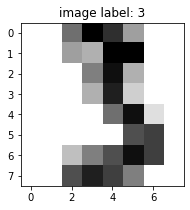

In [2]:
sample_index = 45
plt.figure(figsize=(3, 3))
plt.imshow(digits.images[sample_index], cmap=plt.cm.gray_r,
           interpolation='nearest')
plt.title("image label: %d" % digits.target[sample_index]);

### Preprocessing

- normalization
- train/test split

In [3]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

data = np.asarray(digits.data, dtype='float32')
target = np.asarray(digits.target, dtype='int32')

X_train, X_test, y_train, y_test = train_test_split(
    data, target, test_size=0.15, random_state=37)

# mean = 0 ; standard deviation = 1.0
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# print(scaler.mean_)
# print(scaler.scale_)

Let's display the one of the transformed sample (after feature standardization):

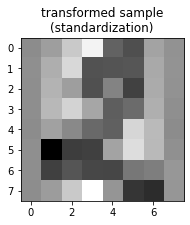

In [4]:
sample_index = 45
plt.figure(figsize=(3, 3))
plt.imshow(X_train[sample_index].reshape(8, 8),
           cmap=plt.cm.gray_r, interpolation='nearest')
plt.title("transformed sample\n(standardization)");

The scaler objects makes it possible to recover the original sample:

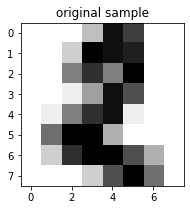

In [5]:
plt.figure(figsize=(3, 3))
plt.imshow(scaler.inverse_transform(X_train[sample_index]).reshape(8, 8),
           cmap=plt.cm.gray_r, interpolation='nearest')
plt.title("original sample");

In [6]:
print(X_train.shape, y_train.shape)

(1527, 64) (1527,)


In [7]:
print(X_test.shape, y_test.shape)

(270, 64) (270,)


# I) Feed Forward NN with Keras

Objectives of this section:

- Build and train a first feedforward network using `Keras`
    - https://keras.io/getting-started/sequential-model-guide/
- Experiment with different optimizers, activations, size of layers, initializations

### a) Keras Workflow

To build a first neural network we need to turn the target variable into a vector "one-hot-encoding" representation. Here are the labels of the first samples in the training set encoded as integers:

In [9]:
y_train[:3]

array([2, 9, 5], dtype=int32)

Keras provides a utility function to convert integer-encoded categorical variables as one-hot encoded values:

In [8]:
import keras
from keras.utils.np_utils import to_categorical

Y_train = to_categorical(y_train)
Y_train[:3]

Using TensorFlow backend.


array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

We can now build an train a our first feed forward neural network using the high level API from keras:

- first we define the model by stacking layers with the right dimensions
- then we define a loss function and plug the SGD optimizer
- then we feed the model the training data for fixed number of epochs

In [10]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras import optimizers

N = X_train.shape[1]
H = 100
K = 10

model = Sequential()
model.add(Dense(H, input_dim=N))
model.add(Activation("tanh"))
model.add(Dense(K))
model.add(Activation("softmax"))

model.compile(optimizer=optimizers.SGD(lr=0.1),
              loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, Y_train, epochs=15, batch_size=32);

Epoch 1/15
1527/1527 [==============================] - 1s 741us/step - loss: 0.8506 - accuracy: 0.7721
Epoch 2/15
1527/1527 [==============================] - 1s 328us/step - loss: 0.2922 - accuracy: 0.9398
Epoch 3/15
1527/1527 [==============================] - 0s 285us/step - loss: 0.1973 - accuracy: 0.9587
Epoch 4/15
1527/1527 [==============================] - 0s 294us/step - loss: 0.1538 - accuracy: 0.9725
Epoch 5/15
1527/1527 [==============================] - 0s 298us/step - loss: 0.1268 - accuracy: 0.9784
Epoch 6/15
1527/1527 [==============================] - 1s 339us/step - loss: 0.1092 - accuracy: 0.9777
Epoch 7/15
1527/1527 [==============================] - 0s 280us/step - loss: 0.0954 - accuracy: 0.9836
Epoch 8/15
1527/1527 [==============================] - 0s 269us/step - loss: 0.0846 - accuracy: 0.9869
Epoch 9/15
1527/1527 [==============================] - 0s 286us/step - loss: 0.0765 - accuracy: 0.9876
Epoch 10/15
1527/1527 [==============================] - 1s 438u

### b) Exercises: Impact of the Optimizer

- Try to decrease the learning rate value by 10 or 100. What do you observe?

- Try to increase the learning rate value to make the optimization diverge.

- Configure the SGD optimizer to enable a Nesterov momentum of 0.9
  
Note that the keras API documentation is available at:

https://keras.io/

It is also possible to learn more about the parameters of a class by using the question mark: type and evaluate:

```python
optimizers.SGD?
```

in a jupyter notebook cell.

In [11]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras import optimizers

N = X_train.shape[1]
H = 100
K = 10
lr = 0.1
print("\n======== Decrease Learning Value by 10 ==>  Plus de temps à converger  =========")
model = Sequential()
model.add(Dense(H, input_dim=N))
model.add(Activation("tanh"))
model.add(Dense(K))
model.add(Activation("softmax"))
model.compile(optimizer=optimizers.SGD(learning_rate=lr/10),
              loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, Y_train, epochs=15, batch_size=32);


======== Decrease Learning Value by 10 ==>  Plus de temps à converger  =========
Epoch 1/15
1527/1527 [==============================] - 1s 763us/step - loss: 1.9092 - accuracy: 0.3857
Epoch 2/15
1527/1527 [==============================] - 1s 373us/step - loss: 1.2345 - accuracy: 0.7197
Epoch 3/15
1527/1527 [==============================] - 0s 300us/step - loss: 0.9035 - accuracy: 0.8199
Epoch 4/15
1527/1527 [==============================] - 0s 258us/step - loss: 0.7212 - accuracy: 0.8651
Epoch 5/15
1527/1527 [==============================] - 1s 329us/step - loss: 0.6072 - accuracy: 0.8808
Epoch 6/15
1527/1527 [==============================] - 1s 440us/step - loss: 0.5287 - accuracy: 0.8933
Epoch 7/15
1527/1527 [==============================] - 0s 303us/step - loss: 0.4712 - accuracy: 0.9064
Epoch 8/15
1527/1527 [==============================] - 0s 259us/step - loss: 0.4268 - accuracy: 0.9162
Epoch 9/15
1527/1527 [==============================] - 0s 265us/step - loss: 0.3915 -

In [13]:
print("\n======== Decrease Learning Value by 100 ==>  Plus de temps à converger  =========")
model = Sequential()
model.add(Dense(H, input_dim=N))
model.add(Activation("tanh"))
model.add(Dense(K))
model.add(Activation("softmax"))
model.compile(optimizer=optimizers.SGD(learning_rate=lr/100),
              loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, Y_train, epochs=15, batch_size=32);


======== Decrease Learning Value by 100 ==>  Plus de temps à converger  =========
Epoch 1/15
1527/1527 [==============================] - 1s 637us/step - loss: 2.4460 - accuracy: 0.0858
Epoch 2/15
1527/1527 [==============================] - 0s 221us/step - loss: 2.3237 - accuracy: 0.1225
Epoch 3/15
1527/1527 [==============================] - 0s 225us/step - loss: 2.2092 - accuracy: 0.1703
Epoch 4/15
1527/1527 [==============================] - 0s 212us/step - loss: 2.1018 - accuracy: 0.2128
Epoch 5/15
1527/1527 [==============================] - 1s 334us/step - loss: 2.0014 - accuracy: 0.2620
Epoch 6/15
1527/1527 [==============================] - 1s 342us/step - loss: 1.9076 - accuracy: 0.3137
Epoch 7/15
1527/1527 [==============================] - 0s 267us/step - loss: 1.8201 - accuracy: 0.3556
Epoch 8/15
1527/1527 [==============================] - 0s 290us/step - loss: 1.7386 - accuracy: 0.4028
Epoch 9/15
1527/1527 [==============================] - 0s 244us/step - loss: 1.6627 

In [12]:
print("\n======== Increase Learning Value by 10 ==> Divergence =========")
model = Sequential()
model.add(Dense(H, input_dim=N))
model.add(Activation("tanh"))
model.add(Dense(K))
model.add(Activation("softmax"))
model.compile(optimizer=optimizers.SGD(learning_rate=100),
              loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, Y_train, epochs=15, batch_size=32);


======== Increase Learning Value by 10 ==> Divergence =========
Epoch 1/15
1527/1527 [==============================] - 1s 495us/step - loss: 79.0146 - accuracy: 0.6758
Epoch 2/15
1527/1527 [==============================] - 0s 288us/step - loss: 33.7651 - accuracy: 0.8500
Epoch 3/15
1527/1527 [==============================] - 0s 273us/step - loss: 32.9876 - accuracy: 0.8546
Epoch 4/15
1527/1527 [==============================] - 0s 270us/step - loss: 24.3825 - accuracy: 0.8880
Epoch 5/15
1527/1527 [==============================] - 0s 298us/step - loss: 21.7714 - accuracy: 0.8965
Epoch 6/15
1527/1527 [==============================] - 0s 276us/step - loss: 18.3003 - accuracy: 0.9077
Epoch 7/15
1527/1527 [==============================] - 0s 193us/step - loss: 19.8625 - accuracy: 0.9044
Epoch 8/15
1527/1527 [==============================] - 0s 194us/step - loss: 23.6978 - accuracy: 0.8965
Epoch 9/15
1527/1527 [==============================] - 0s 232us/step - loss: 18.1835 - accurac

In [14]:
print("\n======== SANS momentum de NESTEROV à 0.9 =========")
model = Sequential()
model.add(Dense(H, input_dim=N))
model.add(Activation("tanh"))
model.add(Dense(K))
model.add(Activation("softmax"))
model.compile(optimizer=optimizers.SGD(learning_rate=0.1),
              loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, Y_train, epochs=15, batch_size=32);


======== SANS momentum de NESTEROV à 0.9 =========
Epoch 1/15
1527/1527 [==============================] - 1s 869us/step - loss: 0.8582 - accuracy: 0.7773
Epoch 2/15
1527/1527 [==============================] - 0s 166us/step - loss: 0.2860 - accuracy: 0.9443
Epoch 3/15
1527/1527 [==============================] - 0s 203us/step - loss: 0.1952 - accuracy: 0.9640
Epoch 4/15
1527/1527 [==============================] - 0s 256us/step - loss: 0.1522 - accuracy: 0.9705
Epoch 5/15
1527/1527 [==============================] - 0s 253us/step - loss: 0.1256 - accuracy: 0.9790
Epoch 6/15
1527/1527 [==============================] - 0s 235us/step - loss: 0.1064 - accuracy: 0.9830
Epoch 7/15
1527/1527 [==============================] - 0s 214us/step - loss: 0.0936 - accuracy: 0.9849
Epoch 8/15
1527/1527 [==============================] - 0s 209us/step - loss: 0.0827 - accuracy: 0.9869
Epoch 9/15
1527/1527 [==============================] - 0s 247us/step - loss: 0.0746 - accuracy: 0.9889
Epoch 10/15


In [15]:
print("\n======== AVEC momentum de NESTEROV à 0.9 =========")
model = Sequential()
model.add(Dense(H, input_dim=N))
model.add(Activation("tanh"))
model.add(Dense(K))
model.add(Activation("softmax"))
model.compile(optimizer=optimizers.SGD(learning_rate=0.1, momentum=0.9, nesterov=True),
              loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, Y_train, epochs=15, batch_size=32);


======== AVEC momentum de NESTEROV à 0.9 =========
Epoch 1/15
1527/1527 [==============================] - 1s 630us/step - loss: 0.4047 - accuracy: 0.8743
Epoch 2/15
1527/1527 [==============================] - 0s 308us/step - loss: 0.0836 - accuracy: 0.9810
Epoch 3/15
1527/1527 [==============================] - 0s 309us/step - loss: 0.0355 - accuracy: 0.9935
Epoch 4/15
1527/1527 [==============================] - 0s 321us/step - loss: 0.0170 - accuracy: 0.9974
Epoch 5/15
1527/1527 [==============================] - 0s 294us/step - loss: 0.0114 - accuracy: 0.9993
Epoch 6/15
1527/1527 [==============================] - 0s 249us/step - loss: 0.0077 - accuracy: 1.0000
Epoch 7/15
1527/1527 [==============================] - 0s 238us/step - loss: 0.0058 - accuracy: 1.0000
Epoch 8/15
1527/1527 [==============================] - 0s 243us/step - loss: 0.0047 - accuracy: 1.0000
Epoch 9/15
1527/1527 [==============================] - 1s 347us/step - loss: 0.0041 - accuracy: 1.0000
Epoch 10/15


In [16]:
# %load solutions/keras_sgd_and_momentum.py

- Replace the SGD optimizer by the Adam optimizer from keras and run it
  with the default parameters.

- Add another hidden layer and use the "Rectified Linear Unit" for each
  hidden layer. Can you still train the model with Adam with its default global
  learning rate?

- Bonus: try the Adadelta optimizer (no learning rate to set).

Hint: use `optimizers.<TAB>` to tab-complete the list of implemented optimizers in Keras.

In [26]:
print("\n======== ADAM Optimizer =========")
model = Sequential()
model.add(Dense(H, input_dim=N))
model.add(Activation("tanh"))
model.add(Dense(K))
model.add(Activation("softmax"))
model.compile(optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, Y_train, epochs=15, batch_size=32);


======== ADAM Optimizer =========
Epoch 1/15
1527/1527 [==============================] - 2s 997us/step - loss: 1.3475 - accuracy: 0.6012
Epoch 2/15
1527/1527 [==============================] - 0s 240us/step - loss: 0.5080 - accuracy: 0.9031
Epoch 3/15
1527/1527 [==============================] - 0s 280us/step - loss: 0.3168 - accuracy: 0.9411
Epoch 4/15
1527/1527 [==============================] - 0s 275us/step - loss: 0.2309 - accuracy: 0.9561
Epoch 5/15
1527/1527 [==============================] - 1s 343us/step - loss: 0.1814 - accuracy: 0.9666
Epoch 6/15
1527/1527 [==============================] - 0s 311us/step - loss: 0.1495 - accuracy: 0.9751
Epoch 7/15
1527/1527 [==============================] - 0s 304us/step - loss: 0.1269 - accuracy: 0.9804
Epoch 8/15
1527/1527 [==============================] - 0s 219us/step - loss: 0.1093 - accuracy: 0.9823
Epoch 9/15
1527/1527 [==============================] - 0s 306us/step - loss: 0.0951 - accuracy: 0.9882
Epoch 10/15
1527/1527 [======

In [32]:
print("\n======== ADAM Optimizer + 1 hidden layer ReLu =========")
model = Sequential()
model.add(Dense(H, input_dim=N))
model.add(Activation("relu"))
model.add(Dense(K))
model.add(Activation('relu'))
model.add(Dense(K))
model.add(Activation("relu"))
model.compile(optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, Y_train, epochs=15, batch_size=32);


======== ADAM Optimizer + 1 hidden layer ReLu =========
Epoch 1/15
1527/1527 [==============================] - 2s 1ms/step - loss: 5.1669 - accuracy: 0.2750
Epoch 2/15
1527/1527 [==============================] - 1s 405us/step - loss: 4.4122 - accuracy: 0.4342
Epoch 3/15
1527/1527 [==============================] - 0s 189us/step - loss: 4.2029 - accuracy: 0.5462
Epoch 4/15
1527/1527 [==============================] - 1s 436us/step - loss: nan - accuracy: 0.5350
Epoch 5/15
1527/1527 [==============================] - 1s 448us/step - loss: nan - accuracy: 0.0989
Epoch 6/15
1527/1527 [==============================] - 1s 380us/step - loss: nan - accuracy: 0.0989
Epoch 7/15
1527/1527 [==============================] - 1s 646us/step - loss: nan - accuracy: 0.0989
Epoch 8/15
1527/1527 [==============================] - 1s 367us/step - loss: nan - accuracy: 0.0989
Epoch 9/15
1527/1527 [==============================] - 1s 448us/step - loss: nan - accuracy: 0.0989
Epoch 10/15
1527/1527 [====

### Important :
Peut importe le nombre de epochs l'accuracy n'est jamais à 1 et la perte devient NaN

In [33]:
print("\n======== Adadelta Optimizer =========")
model = Sequential()
model.add(Dense(H, input_dim=N))
model.add(Activation("tanh"))
model.add(Dense(K))
model.add(Activation("softmax"))
model.compile(optimizers.Adadelta(),
              loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, Y_train, epochs=15, batch_size=32);


======== Adadelta Optimizer =========
Epoch 1/15
1527/1527 [==============================] - 1s 878us/step - loss: 1.2919 - accuracy: 0.6542
Epoch 2/15
1527/1527 [==============================] - 0s 236us/step - loss: 0.5055 - accuracy: 0.9050
Epoch 3/15
1527/1527 [==============================] - 0s 257us/step - loss: 0.3159 - accuracy: 0.9430
Epoch 4/15
1527/1527 [==============================] - 0s 249us/step - loss: 0.2295 - accuracy: 0.9574
Epoch 5/15
1527/1527 [==============================] - 1s 332us/step - loss: 0.1776 - accuracy: 0.9725
Epoch 6/15
1527/1527 [==============================] - 0s 312us/step - loss: 0.1439 - accuracy: 0.9745
Epoch 7/15
1527/1527 [==============================] - 0s 315us/step - loss: 0.1204 - accuracy: 0.9797
Epoch 8/15
1527/1527 [==============================] - 0s 296us/step - loss: 0.1019 - accuracy: 0.9823
Epoch 9/15
1527/1527 [==============================] - 1s 334us/step - loss: 0.0882 - accuracy: 0.9830
Epoch 10/15
1527/1527 [==

In [ ]:
# %load solutions/keras_adam_and_adadelta.py

### c) Exercises: forward pass and generalization

- Compute predictions on test set using `model.predict_classes(...)`
- Compute average accuracy of the model on the test set

test acc: 0.9704


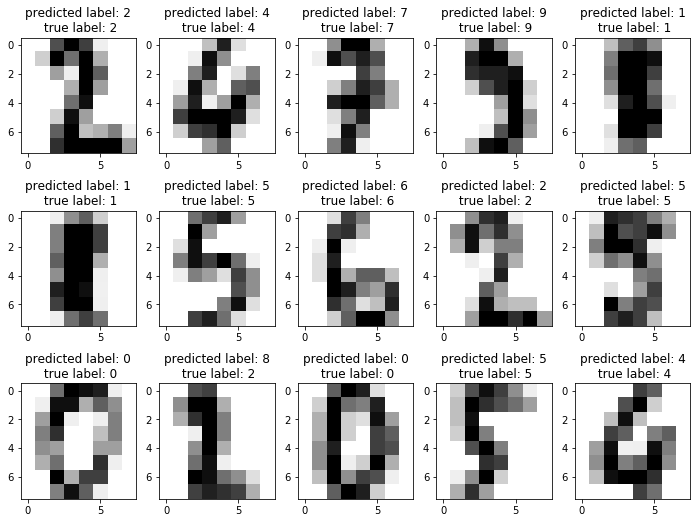

In [34]:
y_predicted = model.predict_classes(X_test, verbose=0)

# Let's display the first inputs image, the predicted labels and the true labels
fig, axes = plt.subplots(ncols=5, nrows=3, figsize=(12, 9))
for i, ax in enumerate(axes.ravel()):
    ax.imshow(scaler.inverse_transform(X_test[i]).reshape(8, 8),
              cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title("predicted label: %d\n true label: %d"
                 % (y_predicted[i], y_test[i]))
    
print("test acc: %0.4f" % np.mean(y_predicted == y_test))

In [ ]:
# %load solutions/keras_accuracy_on_test_set.py

## d) Home assignment: impact of initialization

Let us now study the impact of a bad initialization when training
a deep feed forward network.

By default Keras dense layers use the "Glorot Uniform" initialization
strategy to initialize the weight matrices:

- each weight coefficient is randomly sampled from [-scale, scale]
- scale is proportional to $\frac{1}{\sqrt{n_{in} + n_{out}}}$

This strategy is known to work well to initialize deep neural networks
with "tanh" or "relu" activation functions and then trained with
standard SGD.

To assess the impact of initialization let us plug an alternative init
scheme into a 2 hidden layers networks with "tanh" activations.
For the sake of the example let's use normal distributed weights
with a manually adjustable scale (standard deviation) and see the
impact the scale value:

In [35]:
from keras import initializers

normal_init = initializers.RandomNormal(stddev=0.01)

model = Sequential()
model.add(Dense(H, input_dim=N, kernel_initializer=normal_init))
model.add(Activation("tanh"))
model.add(Dense(K, kernel_initializer=normal_init))
model.add(Activation("tanh"))
model.add(Dense(K, kernel_initializer=normal_init))
model.add(Activation("softmax"))

model.compile(optimizer=optimizers.SGD(lr=0.1),
              loss='categorical_crossentropy')

history = model.fit(X_train, Y_train,
                    epochs=10, batch_size=32)

Epoch 1/10
1527/1527 [==============================] - 1s 734us/step - loss: 2.3035
Epoch 2/10
1527/1527 [==============================] - 0s 268us/step - loss: 2.3027
Epoch 3/10
1527/1527 [==============================] - 1s 444us/step - loss: 2.3015
Epoch 4/10
1527/1527 [==============================] - 1s 437us/step - loss: 2.2969
Epoch 5/10
1527/1527 [==============================] - 1s 478us/step - loss: 2.2313
Epoch 6/10
1527/1527 [==============================] - 1s 433us/step - loss: 1.8935
Epoch 7/10
1527/1527 [==============================] - 1s 377us/step - loss: 1.6027
Epoch 8/10
1527/1527 [==============================] - 1s 353us/step - loss: 1.3551
Epoch 9/10
1527/1527 [==============================] - 0s 220us/step - loss: 1.1852
Epoch 10/10
1527/1527 [==============================] - 0s 283us/step - loss: 1.0169


#### Questions:

- Try the following initialization schemes and see whether
  the SGD algorithm can successfully train the network or
  not:
  
  - a very small e.g. `scale=1e-3`
  - a larger scale e.g. `scale=1` or `10`
  - initialize all weights to 0 (constant initialization)
  
- What do you observe? Can you find an explanation for those
  outcomes?

- Are better solvers such as SGD with momentum or Adam able
  to deal better with such bad initializations?

In [41]:
print('======== Scale = 1e-3 ===========')
normal_init = initializers.RandomNormal(stddev=1e-3)
model = Sequential()
model.add(Dense(H, input_dim=N, kernel_initializer=normal_init))
model.add(Activation("tanh"))
model.add(Dense(K, kernel_initializer=normal_init))
model.add(Activation("tanh"))
model.add(Dense(K, kernel_initializer=normal_init))
model.add(Activation("softmax"))

model.compile(optimizer=optimizers.SGD(lr=0.1),
              loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, Y_train,
                    epochs=10, batch_size=32)

======== Scale = 1e-3 ===========
Epoch 1/10
1527/1527 [==============================] - 1s 662us/step - loss: 2.3034 - accuracy: 0.0976
Epoch 2/10
1527/1527 [==============================] - 0s 200us/step - loss: 2.3031 - accuracy: 0.0963
Epoch 3/10
1527/1527 [==============================] - 0s 122us/step - loss: 2.3031 - accuracy: 0.1041
Epoch 4/10
1527/1527 [==============================] - 0s 259us/step - loss: 2.3031 - accuracy: 0.1087
Epoch 5/10
1527/1527 [==============================] - 0s 291us/step - loss: 2.3029 - accuracy: 0.1048
Epoch 6/10
1527/1527 [==============================] - 0s 282us/step - loss: 2.3029 - accuracy: 0.1087
Epoch 7/10
1527/1527 [==============================] - 0s 280us/step - loss: 2.3029 - accuracy: 0.1087
Epoch 8/10
1527/1527 [==============================] - 0s 256us/step - loss: 2.3030 - accuracy: 0.1067
Epoch 9/10
1527/1527 [==============================] - 0s 302us/step - loss: 2.3031 - accuracy: 0.1087
Epoch 10/10
1527/1527 [=======

In [39]:
print('======== Scale = 10 ===========')
normal_init = initializers.RandomNormal(stddev=10)
model = Sequential()
model.add(Dense(H, input_dim=N, kernel_initializer=normal_init))
model.add(Activation("tanh"))
model.add(Dense(K, kernel_initializer=normal_init))
model.add(Activation("tanh"))
model.add(Dense(K, kernel_initializer=normal_init))
model.add(Activation("softmax"))

model.compile(optimizer=optimizers.SGD(lr=0.1),
              loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, Y_train,
                    epochs=10, batch_size=32)

======== Scale = 10 ===========
Epoch 1/10
1527/1527 [==============================] - 1s 566us/step - loss: 50.3604 - accuracy: 0.1002
Epoch 2/10
1527/1527 [==============================] - 0s 217us/step - loss: 44.5827 - accuracy: 0.1316
Epoch 3/10
1527/1527 [==============================] - 1s 360us/step - loss: 40.0994 - accuracy: 0.1526
Epoch 4/10
1527/1527 [==============================] - 0s 292us/step - loss: 36.2844 - accuracy: 0.1742
Epoch 5/10
1527/1527 [==============================] - 0s 144us/step - loss: 32.4103 - accuracy: 0.2010
Epoch 6/10
1527/1527 [==============================] - 0s 247us/step - loss: 29.3330 - accuracy: 0.2233
Epoch 7/10
1527/1527 [==============================] - 1s 425us/step - loss: 26.6648 - accuracy: 0.2358
Epoch 8/10
1527/1527 [==============================] - 1s 346us/step - loss: 24.3421 - accuracy: 0.2672
Epoch 9/10
1527/1527 [==============================] - 0s 302us/step - loss: 22.7096 - accuracy: 0.2895
Epoch 10/10
1527/1527 [

In [40]:
print('======== Scale = 0 ===========')
normal_init = initializers.RandomNormal(stddev=0)
model = Sequential()
model.add(Dense(H, input_dim=N, kernel_initializer=normal_init))
model.add(Activation("tanh"))
model.add(Dense(K, kernel_initializer=normal_init))
model.add(Activation("tanh"))
model.add(Dense(K, kernel_initializer=normal_init))
model.add(Activation("softmax"))

model.compile(optimizer=optimizers.SGD(lr=0.1),
              loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, Y_train,
                    epochs=10, batch_size=32)

======== Scale = 0 ===========
Epoch 1/10
1527/1527 [==============================] - 1s 589us/step - loss: 2.3036 - accuracy: 0.0963
Epoch 2/10
1527/1527 [==============================] - 0s 273us/step - loss: 2.3033 - accuracy: 0.1041
Epoch 3/10
1527/1527 [==============================] - 1s 372us/step - loss: 2.3031 - accuracy: 0.1087
Epoch 4/10
1527/1527 [==============================] - 0s 214us/step - loss: 2.3029 - accuracy: 0.1087
Epoch 5/10
1527/1527 [==============================] - 1s 328us/step - loss: 2.3029 - accuracy: 0.1087
Epoch 6/10
1527/1527 [==============================] - 1s 382us/step - loss: 2.3030 - accuracy: 0.1087
Epoch 7/10
1527/1527 [==============================] - 1s 377us/step - loss: 2.3029 - accuracy: 0.1087
Epoch 8/10
1527/1527 [==============================] - 1s 402us/step - loss: 2.3031 - accuracy: 0.1087
Epoch 9/10
1527/1527 [==============================] - 0s 227us/step - loss: 2.3031 - accuracy: 0.1087
Epoch 10/10
1527/1527 [==========

In [43]:
init = {
    "1e-3" : initializers.RandomNormal(stddev=1e-3),
    "10" : initializers.RandomNormal(stddev=10),
    "0" : initializers.RandomNormal(stddev=0)
}

optimizer = {
    'SGD' : optimizers.SGD(lr=0.1),
    'SGD momentum' : optimizers.SGD(learning_rate=0.1, momentum=0.9, nesterov=True),
    'Adeldelta' : optimizers.Adadelta(),
    'Adam' : optimizers.Adam(learning_rate=0.001)
}
for initialisation in init:
    print('============================== init:' + initialisation + '==================================')
    for opt in optimizer:
        print('=========== opt:' + opt +'  ===========')
        model = Sequential()
        model.add(Dense(H, input_dim=N, kernel_initializer=init[initialisation]))
        model.add(Activation("tanh"))
        model.add(Dense(K, kernel_initializer=init[initialisation]))
        model.add(Activation("tanh"))
        model.add(Dense(K, kernel_initializer=init[initialisation]))
        model.add(Activation("softmax"))

        model.compile(optimizer=optimizer[opt],
                    loss='categorical_crossentropy', metrics=['accuracy'])

        history = model.fit(X_train, Y_train,
                            epochs=10, batch_size=32)
    print('\n')

============================== init:1e-3==================================
=========== opt:SGD  ===========
Epoch 1/10
1527/1527 [==============================] - 1s 558us/step - loss: 2.3035 - accuracy: 0.0989
Epoch 2/10
1527/1527 [==============================] - 0s 208us/step - loss: 2.3031 - accuracy: 0.1048
Epoch 3/10
1527/1527 [==============================] - 0s 278us/step - loss: 2.3029 - accuracy: 0.1087
Epoch 4/10
1527/1527 [==============================] - 0s 295us/step - loss: 2.3028 - accuracy: 0.1087
Epoch 5/10
1527/1527 [==============================] - 1s 354us/step - loss: 2.3031 - accuracy: 0.1087
Epoch 6/10
1527/1527 [==============================] - 1s 345us/step - loss: 2.3030 - accuracy: 0.1074
Epoch 7/10
1527/1527 [==============================] - 0s 225us/step - loss: 2.3030 - accuracy: 0.1074
Epoch 8/10
1527/1527 [==============================] - 0s 205us/step - loss: 2.3030 - accuracy: 0.1087
Epoch 9/10
1527/1527 [==============================] - 1s 3

### Important :
Pour l'initialisation à 1e-3 les optimizers SGD momentum et Adeldelta sont plus efficaces.<br>
Pour l'initialisation à 10 l'optimizers SGD de base semblent plus efficace que les autres.<br>
Pour l'initialisation à 0 Aucun algo ne fonctionne mais Adam est le plus rapide à converger à 0.1087 d'accuracy

In [ ]:
# %load solutions/keras_initializations.py

In [ ]:
# %load solutions/keras_initializations_analysis.py